1. Problem Statement
You're aiming to predict life expectancy using various features from the dataset.

2. Objective
To build a machine learning model that predicts life expectancy.


In [24]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000


In [25]:
df.tail()

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
6403,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LI,Low_income,ZWE,Zimbabwe,FMLE,Female,16,16.0
6404,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LI,Low_income,ZWE,Zimbabwe,MLE,Male,15,15.0
6405,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,AFR,Africa,WB_LI,Low_income,ZWE,Zimbabwe,BTSX,Both sexes,18,18.0
6406,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,AFR,Africa,WB_LI,Low_income,ZWE,Zimbabwe,FMLE,Female,18,18.0
6407,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,AFR,Africa,WB_LI,Low_income,ZWE,Zimbabwe,MLE,Male,17,17.0


In [27]:
#exploratory data analysis
#shape
df.shape

(6408, 16)

In [28]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

In [29]:
df.columns

Index(['GhoCode', 'GhoDisplay', 'PublishStateCode', 'PublishStateDisplay',
       'YearCode', 'YearDisplay', 'RegionCode', 'RegionDisplay',
       'WorldBankIncomeGroupGroupCode', 'WorldBankIncomeGroupDisplay',
       'CountryCode', 'CountryDisplay', 'SexCode', 'SexDisplay',
       'DisplayValue', 'Numeric'],
      dtype='object')

In [30]:
#delete the extra spaces
df.columns=df.columns.str.replace(" ","")
df.columns

Index(['GhoCode', 'GhoDisplay', 'PublishStateCode', 'PublishStateDisplay',
       'YearCode', 'YearDisplay', 'RegionCode', 'RegionDisplay',
       'WorldBankIncomeGroupGroupCode', 'WorldBankIncomeGroupDisplay',
       'CountryCode', 'CountryDisplay', 'SexCode', 'SexDisplay',
       'DisplayValue', 'Numeric'],
      dtype='object')

In [31]:
#identify numerical and categorical columns
#numerical columns
num_cols=df.select_dtypes(include='number').columns
print(num_cols)
#out of 16 columns 4 are numerical and 12 are categorical


Index(['YearCode', 'YearDisplay', 'DisplayValue', 'Numeric'], dtype='object')


In [32]:
#categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['GhoCode', 'GhoDisplay', 'PublishStateCode', 'PublishStateDisplay',
       'RegionCode', 'RegionDisplay', 'WorldBankIncomeGroupGroupCode',
       'WorldBankIncomeGroupDisplay', 'CountryCode', 'CountryDisplay',
       'SexCode', 'SexDisplay'],
      dtype='object')


In [33]:
#find dublicates
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

GhoCode                             0
GhoDisplay                          0
PublishStateCode                    0
PublishStateDisplay                 0
YearCode                            0
YearDisplay                         0
RegionCode                          0
RegionDisplay                       0
WorldBankIncomeGroupGroupCode    1164
WorldBankIncomeGroupDisplay      1164
CountryCode                         0
CountryDisplay                      0
SexCode                             0
SexDisplay                          0
DisplayValue                        0
Numeric                             0
dtype: int64

In [35]:
df.isnull().sum()/df.shape[0]*100

GhoCode                           0.000000
GhoDisplay                        0.000000
PublishStateCode                  0.000000
PublishStateDisplay               0.000000
YearCode                          0.000000
YearDisplay                       0.000000
RegionCode                        0.000000
RegionDisplay                     0.000000
WorldBankIncomeGroupGroupCode    18.164794
WorldBankIncomeGroupDisplay      18.164794
CountryCode                       0.000000
CountryDisplay                    0.000000
SexCode                           0.000000
SexDisplay                        0.000000
DisplayValue                      0.000000
Numeric                           0.000000
dtype: float64

In [36]:
#understand the distribution of data
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearCode,6408.0,2005.000936,8.861084,1990.0,2000.0,2012.00000,2013.0,2013.00000
YearDisplay,6408.0,2005.000936,8.861084,1990.0,2000.0,2012.00000,2013.0,2013.00000
DisplayValue,6408.0,48.143571,23.774807,11.0,20.0,57.00000,69.0,87.00000
Numeric,6408.0,48.145528,23.775598,11.0,20.0,56.97971,69.0,87.15457


In [37]:
#categorical columns
df.describe(include="object").T

,count,unique,top,freq
GhoCode,6408,3,WHOSIS_000001,2328
GhoDisplay,6408,3,Life expectancy at birth (years),2328
PublishStateCode,6408,1,PUBLISHED,6408
PublishStateDisplay,6408,1,Published,6408
RegionCode,6408,6,EUR,1749
RegionDisplay,6408,6,Europe,1749
WorldBankIncomeGroupGroupCode,5244,4,WB_LMI,1440
WorldBankIncomeGroupDisplay,5244,4,Lower_middle_income,1440
CountryCode,6408,194,SSD,39
CountryDisplay,6408,194,South Sudan,39


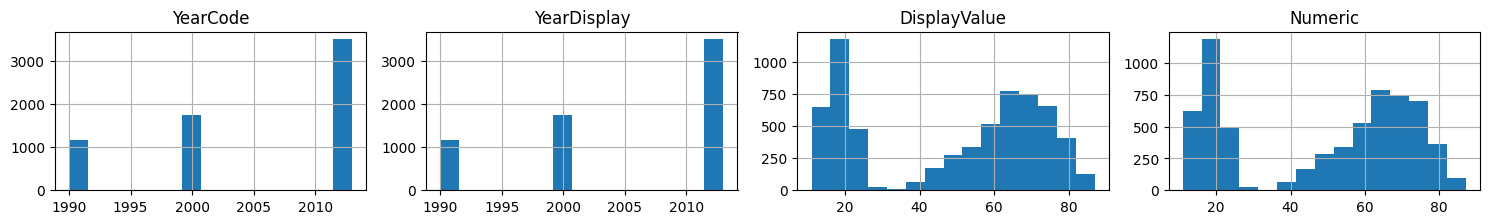

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#histogram for numerical columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

3. **Data Description:**- Source: [Specify the source of data]- Features: [List the features available in the dataset]

In [6]:
import pandas as pd

# Load dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())

         GhoCode                        GhoDisplay PublishStateCode  \
0  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
2  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
4  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   

  PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           Published      2013         2013        EMR   
1           Published      2013         2013        EMR   
2           Published      2013         2013        EMR   
3           Published      2012         2012        EMR   
4           Published      2012         2012        EMR   

           RegionDisplay WorldBankIncomeGroupGroupCode  \
0  Eastern Mediterranean                           NaN   
1  Eastern Mediterranean                           NaN   
2  Eastern Mediterranean                    

 4. **Data Collection:**
 Import the dataset from the specified source.- Gain insights into the data distribution, relationships, and potential patterns.

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                       

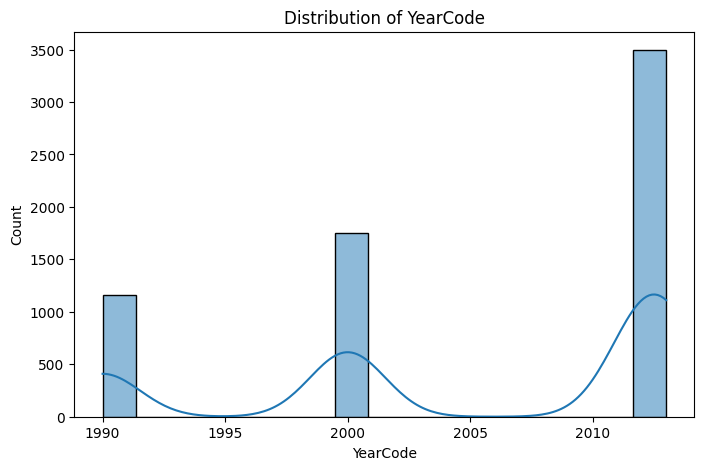

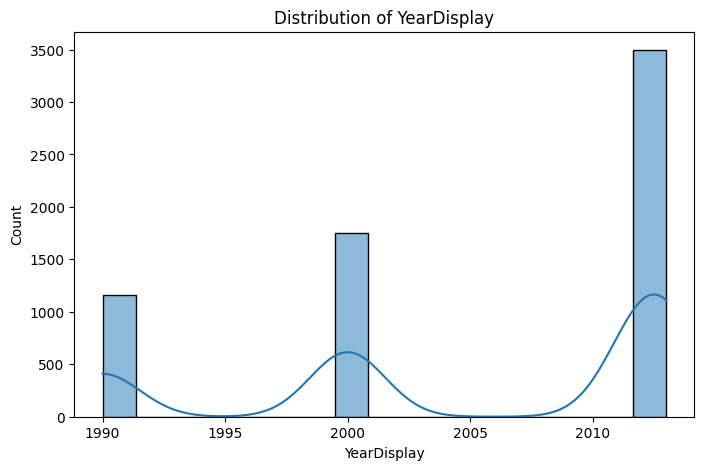

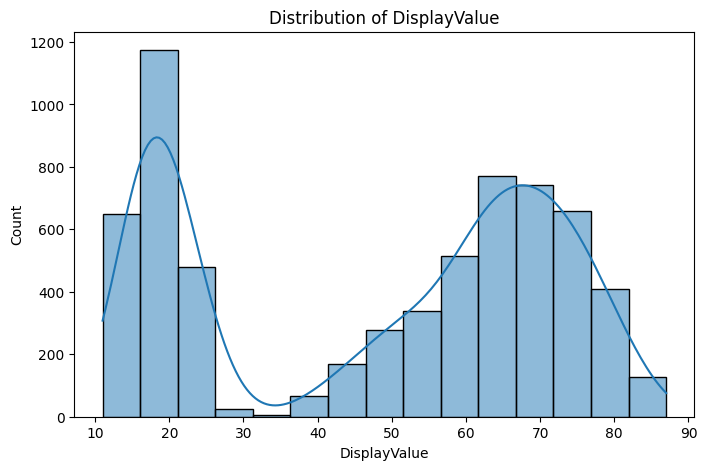

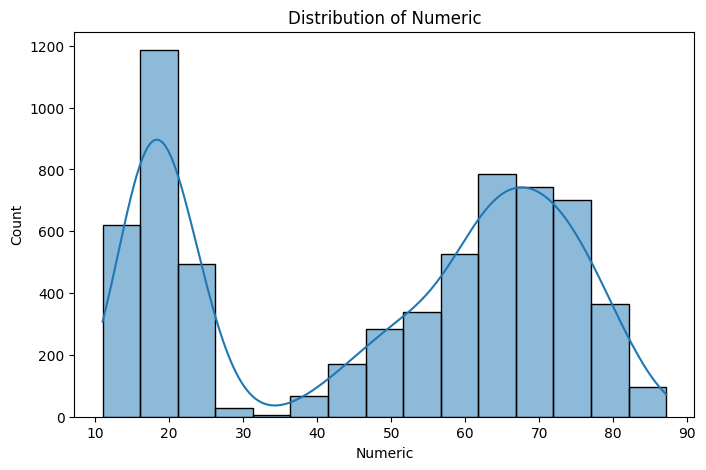

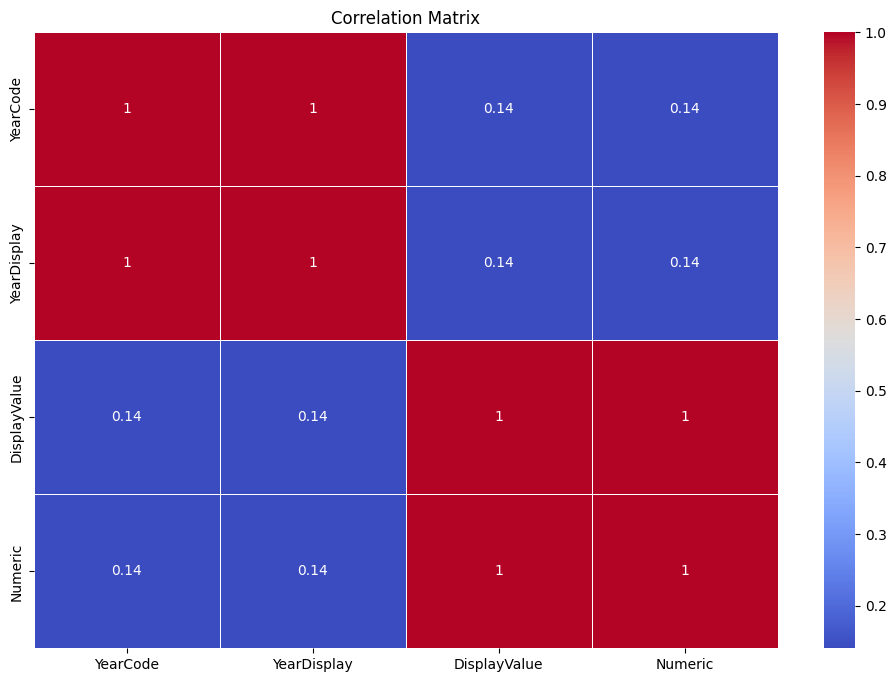

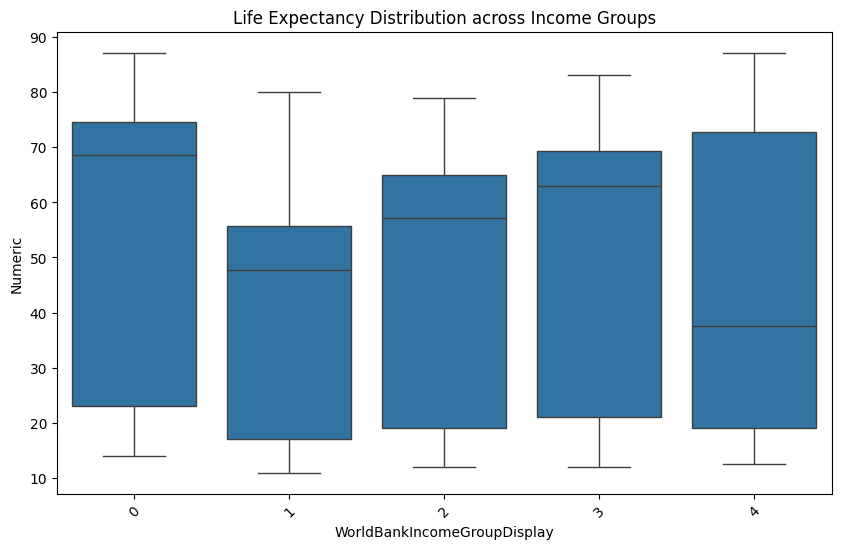

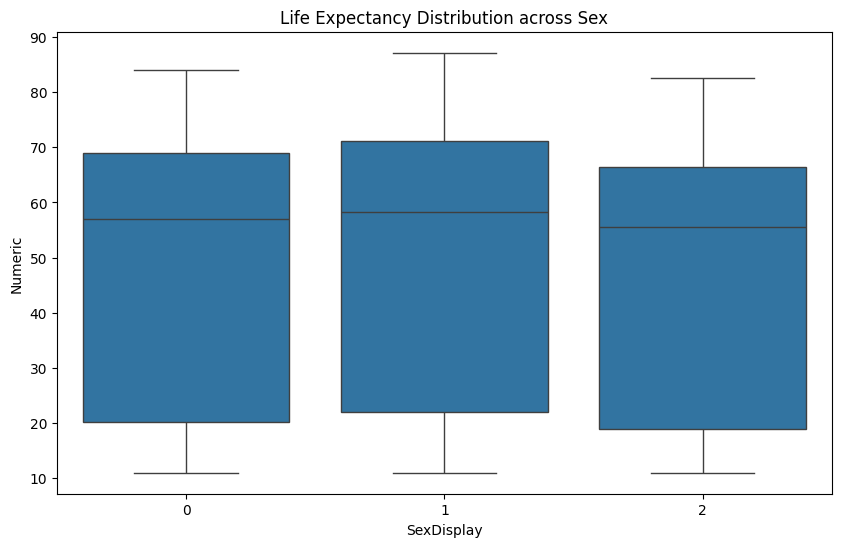

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Step 1: Import the Dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Step 2: Initial Data Inspection
print("Data Information:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Basic statistics of numerical features
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Step 3: Handle Non-Numeric Data
# Drop non-numeric columns for numerical analysis
# Identify columns that are non-numeric
non_numeric_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print("\nNon-Numeric Columns:", non_numeric_columns)

# Drop non-numeric columns for analysis requiring only numeric data
df_numeric = df.drop(columns=non_numeric_columns)

# Step 4: Data Distribution
# Plot distribution for numerical columns
numeric_columns = df_numeric.columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numeric[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Step 5: Correlations and Relationships
# Calculate correlation matrix for numerical features
correlation_matrix = df_numeric.corr()

# Display heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 6: Potential Patterns - Relationship between Income Group and Life Expectancy
# Convert categorical columns into numeric for pattern exploration
le = LabelEncoder()

# Create a new dataframe with label encoding
df_encoded = df.copy()

# Apply label encoding to categorical columns
for col in ['WorldBankIncomeGroupDisplay', 'SexDisplay']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Visualize average life expectancy across different income groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='WorldBankIncomeGroupDisplay', y='Numeric')
plt.title("Life Expectancy Distribution across Income Groups")
plt.xticks(rotation=45)
plt.show()

# Explore the relationship between gender and life expectancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='SexDisplay', y='Numeric')
plt.title("Life Expectancy Distribution across Sex")
plt.show()

 5. **Data Preprocessing- Data Cleaning:**- Handle missing values using appropriate imputation techniques.- Check for and remove outliers using statistical methods.- Address skewed data in numerical features through transformations.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from scipy.stats import zscore

# Load the dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Step 1: Handle Missing Values
# For numeric columns, fill missing values with the median
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# For categorical columns, fill missing values with the mode
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

print("Missing values after imputation:\n", df.isnull().sum())

# Step 2: Detect and Remove Outliers
# Use the IQR method to detect outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


# Remove outliers from numeric columns
df_cleaned = remove_outliers(df, numeric_columns)

# Step 3: Address Skewed Data in Numerical Features
# Check skewness in numerical columns
skewed_columns = df_cleaned[numeric_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in numerical columns:\n", skewed_columns)

# Apply log transformation to positively skewed data, but avoid log(0) issues
df_transformed = df_cleaned.copy()
for col in skewed_columns.index:
    if skewed_columns[col] > 0.5:  # Handle only significantly skewed data
        df_transformed[col] = np.log1p(df_cleaned[col])

# Optional: Use PowerTransformer (Box-Cox or Yeo-Johnson) for skew correction
# power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
# df_transformed[numeric_columns] = power_transformer.fit_transform(df_cleaned[numeric_columns])

# Step 4: Verify Skewness After Transformation
new_skewness = df_transformed[numeric_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness after transformation:\n", new_skewness)

# Final Dataset Info
print("\nCleaned Data Information:")
df_transformed.info()

Missing values after imputation:
 GhoCode                          0
GhoDisplay                       0
PublishStateCode                 0
PublishStateDisplay              0
YearCode                         0
YearDisplay                      0
RegionCode                       0
RegionDisplay                    0
WorldBankIncomeGroupGroupCode    0
WorldBankIncomeGroupDisplay      0
CountryCode                      0
CountryDisplay                   0
SexCode                          0
SexDisplay                       0
DisplayValue                     0
Numeric                          0
dtype: int64

Skewness in numerical columns:
 Numeric        -0.251892
DisplayValue   -0.252042
YearCode       -0.595707
YearDisplay    -0.595707
dtype: float64

Skewness after transformation:
 Numeric        -0.251892
DisplayValue   -0.252042
YearCode       -0.595707
YearDisplay    -0.595707
dtype: float64

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6

6. **Exploratory Data Analysis (EDA):**- Gain insights into the data distribution, relationships, and potential patterns.- Visualizations: Histogram, Boxplot, Pair Plot, Heatmap Correlation, Pie Diagram, Bar Plot,
 Count Plot, Line Plot, Kernel Density Estimation (KDE).

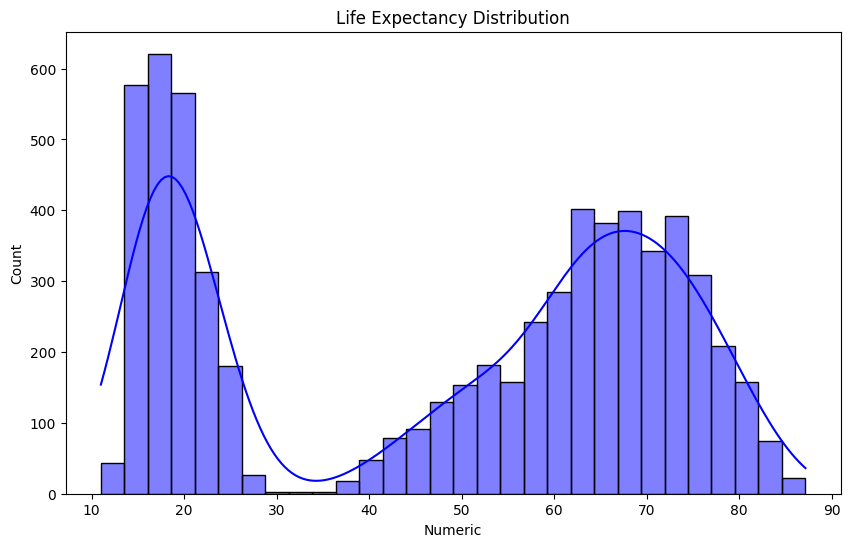

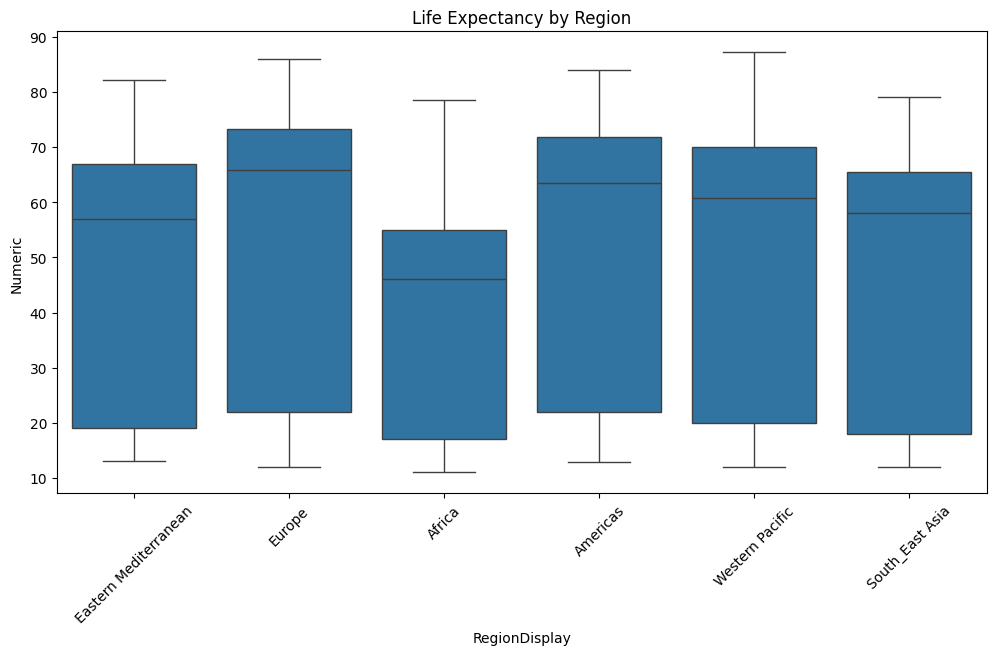

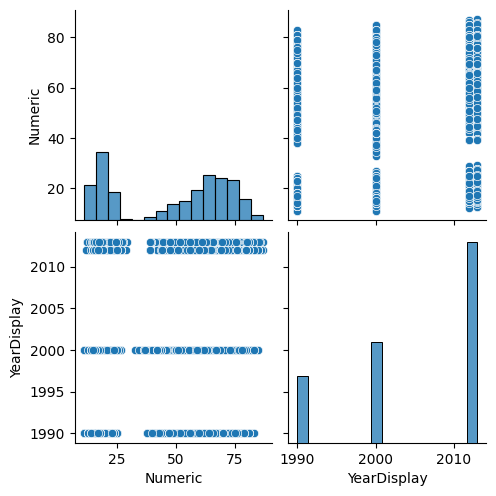

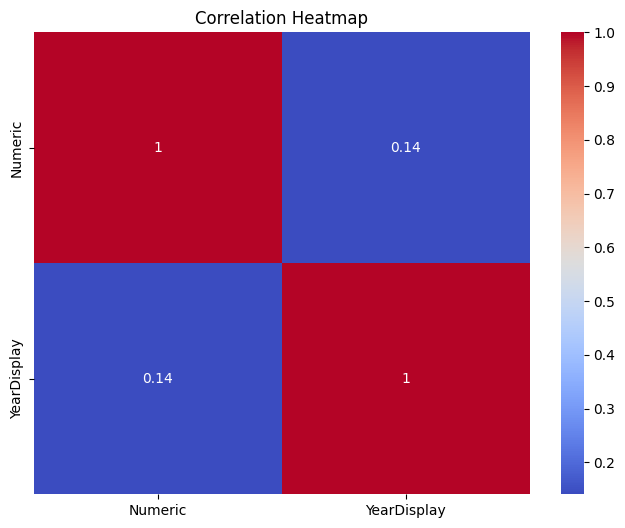

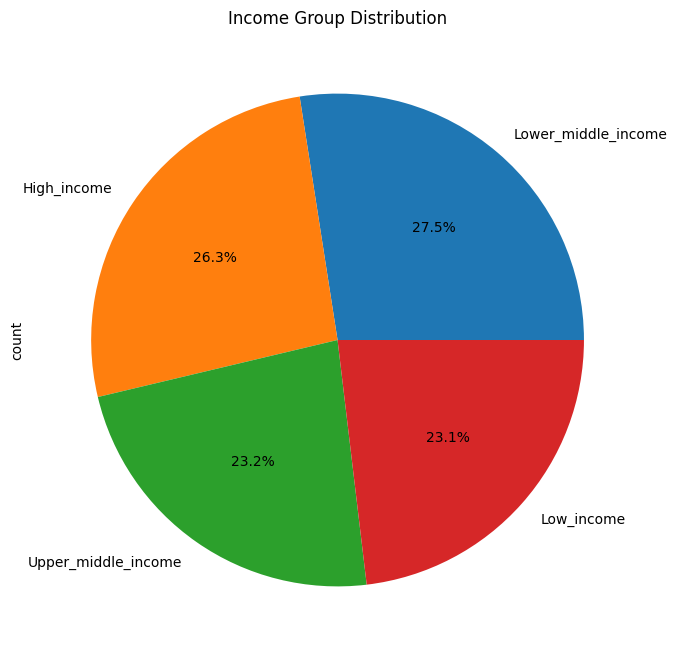

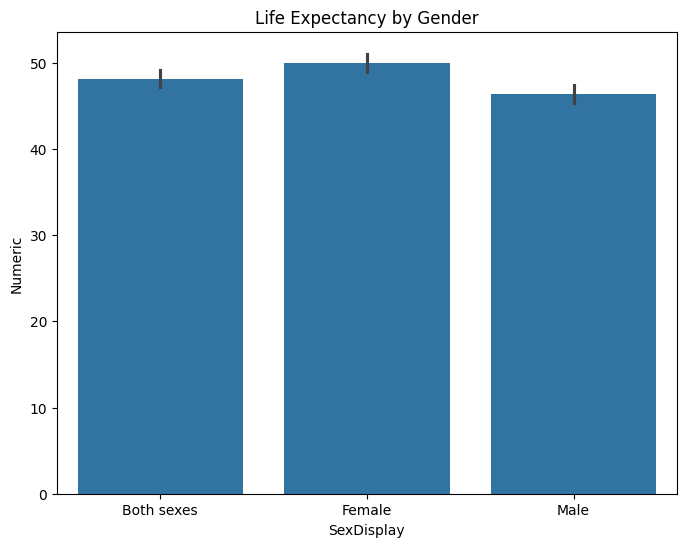

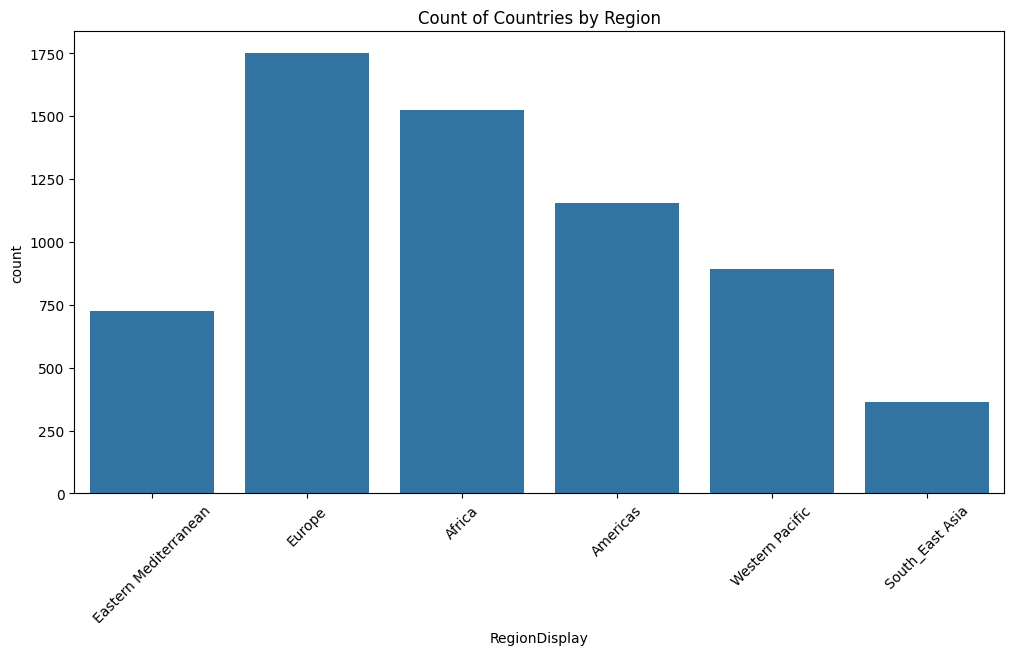

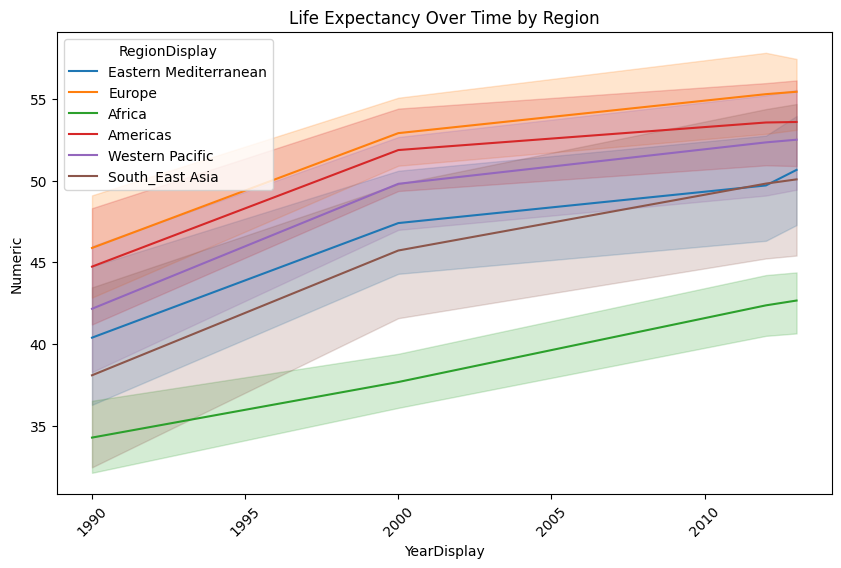

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\1982253198.py:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Numeric'], shade=True)


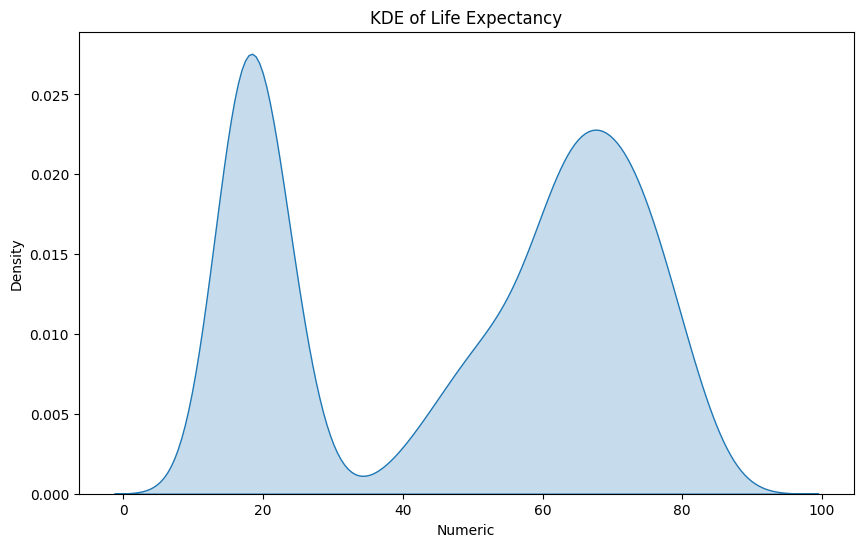

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histogram - Distribution of Life Expectancy
plt.figure(figsize=(10,6))
sns.histplot(df['Numeric'], kde=True, color='blue', bins=30)
plt.title('Life Expectancy Distribution')
plt.show()

# 2. Boxplot - Life Expectancy by Region
plt.figure(figsize=(12,6))
sns.boxplot(x='RegionDisplay', y='Numeric', data=df)
plt.title('Life Expectancy by Region')
plt.xticks(rotation=45)
plt.show()

# 3. Pair Plot - Relationships among numeric features (Life Expectancy, Year)
sns.pairplot(df[['Numeric', 'YearDisplay']])
plt.show()

# 4. Heatmap - Correlation among numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df[['Numeric', 'YearDisplay']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Pie Chart - Distribution of income groups
df['WorldBankIncomeGroupDisplay'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Income Group Distribution')
plt.show()

# 6. Bar Plot - Life Expectancy by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='SexDisplay', y='Numeric', data=df)
plt.title('Life Expectancy by Gender')
plt.show()

# 7. Count Plot - Number of Entries per Region
plt.figure(figsize=(12,6))
sns.countplot(x='RegionDisplay', data=df)
plt.title('Count of Countries by Region')
plt.xticks(rotation=45)
plt.show()

# 8. Line Plot - Life Expectancy Trend Over Time
plt.figure(figsize=(10,6))
sns.lineplot(x='YearDisplay', y='Numeric', hue='RegionDisplay', data=df)
plt.title('Life Expectancy Over Time by Region')
plt.xticks(rotation=45)
plt.show()

# 9. Kernel Density Estimation (KDE) - Life Expectancy Density
plt.figure(figsize=(10,6))
sns.kdeplot(df['Numeric'], shade=True)
plt.title('KDE of Life Expectancy')
plt.show()

 7. **Feature Engineering:**- Identify and encode categorical features using techniques like one-hot encoding or label
 encoding.

In [90]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Identify Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. Apply Label Encoding for 'WorldBankIncomeGroupDisplay' (Ordinal)
label_encoder = LabelEncoder()
df['IncomeGroupEncoded'] = label_encoder.fit_transform(df['WorldBankIncomeGroupDisplay'])

# 3. Apply One-Hot Encoding for 'RegionDisplay' and 'SexDisplay' (Nominal)
df_one_hot = pd.get_dummies(df, columns=['RegionDisplay', 'SexDisplay'], drop_first=True)

# Display the first few rows to show the results of encoding
df_one_hot.head()

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,...,DisplayValue,Numeric,IncomeGroupEncoded,RegionDisplay_Americas,RegionDisplay_Eastern Mediterranean,RegionDisplay_Europe,RegionDisplay_South_East Asia,RegionDisplay_Western Pacific,SexDisplay_Female,SexDisplay_Male
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,NaN,Lower_middle_income,AFG,...,61,61.25205,2,False,True,False,False,False,False,False
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,NaN,Lower_middle_income,AFG,...,62,61.97733,2,False,True,False,False,False,True,False
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,NaN,Lower_middle_income,AFG,...,61,60.51228,2,False,True,False,False,False,False,True
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,WB_LI,Low_income,AFG,...,60,60.00000,1,False,True,False,False,False,False,False
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,WB_LI,Low_income,AFG,...,61,61.00000,1,False,True,False,False,False,True,False


8. **Feature Selection:**- Use algorithms like Random Forest and Select K Best to identify relevant features.- Remove redundant or irrelevant features.

In [92]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Handling non-numeric features:
# Convert categorical columns to numeric using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column that is non-numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now split the data into features (X) and target (y)
# Assuming the last column is the target variable (adjust if needed)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Method 1: Using Random Forest for Feature Importance ---

# Initialize the RandomForestRegressor (instead of RandomForestClassifier)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importance
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted features by importance
print("Feature Importance using Random Forest:")
print(feature_importance_df)

# --- Method 2: Using SelectKBest for Regression ---

# Initialize SelectKBest with the f_regression score function (for regression tasks)
select_k_best = SelectKBest(score_func=f_regression, k=10)  # You can adjust 'k' as needed

# Fit the model
select_k_best.fit(X_train, y_train)

# Get the scores
scores = select_k_best.scores_

# Create a DataFrame for better visualization
select_k_best_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score
select_k_best_df = select_k_best_df.sort_values(by='Score', ascending=False)

# Display the sorted features by SelectKBest
print("\nFeature Importance using SelectKBest:")
print(select_k_best_df)

         GhoCode                        GhoDisplay PublishStateCode  \
0  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
2  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
4  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   

  PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           Published      2013         2013        EMR   
1           Published      2013         2013        EMR   
2           Published      2013         2013        EMR   
3           Published      2012         2012        EMR   
4           Published      2012         2012        EMR   

           RegionDisplay WorldBankIncomeGroupGroupCode  \
0  Eastern Mediterranean                           NaN   
1  Eastern Mediterranean                           NaN   
2  Eastern Mediterranean                    

9. **Split Data into Training and Testing Sets:**- Divide the dataset into training and testing subsets.

In [93]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()


# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Handling non-numeric features:
# Convert categorical columns to numeric using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column that is non-numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now split the data into features (X) and target (y)
# Assuming the last column is the target variable (adjust if needed)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset into training and test sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

         GhoCode                        GhoDisplay PublishStateCode  \
0  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
2  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
4  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   

  PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           Published      2013         2013        EMR   
1           Published      2013         2013        EMR   
2           Published      2013         2013        EMR   
3           Published      2012         2012        EMR   
4           Published      2012         2012        EMR   

           RegionDisplay WorldBankIncomeGroupGroupCode  \
0  Eastern Mediterranean                           NaN   
1  Eastern Mediterranean                           NaN   
2  Eastern Mediterranean                    

 10. **Feature Scaling:**- Scale numerical features if necessary to ensure uniform magnitude using techniques like
 Min-Max scaling or Standardization.

In [94]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Load the dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Handling non-numeric features:
# Convert categorical columns to numeric using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now split the data into features (X) and target (y)
# Assuming the last column is the target variable (adjust if needed)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling: Option 1: Min-Max Scaling (Normalization) ---
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_minmax = min_max_scaler.fit_transform(X_train)
X_test_scaled_minmax = min_max_scaler.transform(X_test)

# Display the scaled data (optional)
print("First few rows of Min-Max scaled training data:")
print(pd.DataFrame(X_train_scaled_minmax, columns=X.columns).head())

# --- Feature Scaling: Option 2: Standardization (Z-score normalization) ---
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_standard = standard_scaler.fit_transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)

# Display the scaled data (optional)
print("First few rows of Standardized (Z-score) training data:")
print(pd.DataFrame(X_train_scaled_standard, columns=X.columns).head())

         GhoCode                        GhoDisplay PublishStateCode  \
0  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
2  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
4  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   

  PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           Published      2013         2013        EMR   
1           Published      2013         2013        EMR   
2           Published      2013         2013        EMR   
3           Published      2012         2012        EMR   
4           Published      2012         2012        EMR   

           RegionDisplay WorldBankIncomeGroupGroupCode  \
0  Eastern Mediterranean                           NaN   
1  Eastern Mediterranean                           NaN   
2  Eastern Mediterranean                    

11. **Build the ML Model:** (at least 5)- Implement various classification and regression algorithms:- Classification: Logistic Regression, SVM, Decision Tree, MLP Classifier, Naive Bayes,
 Random Forest, K-Nearest Neighbors, Gradient Boost, Adaboost.- Regression: SVR, MLP Regressor, Random Forest Regressor, Linear Regression,
 Gradient Boost, Adaboost.

In [137]:
# Let's first inspect the dataset to understand its structure and identify the features for building the regression models.

import pandas as pd

# Load the dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Show the first few rows of the dataset to understand its structure
df.head(), df.info()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Select relevant columns for features and target
features = df[['YearDisplay', 'RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay', 'SexDisplay']]
target = df['Numeric']

# Handle missing values by imputing with the most frequent value (for categorical features)
imputer = SimpleImputer(strategy='most_frequent')
features_imputed = imputer.fit_transform(features)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
features_encoded = pd.DataFrame(features_imputed, columns=features.columns)

for col in features_encoded.columns:
    features_encoded[col] = label_encoder.fit_transform(features_encoded[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Verify the preprocessed data
X_train.head(), y_train.head()
# Import necessary regression models and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(max_iter=1000, random_state=42),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Dictionary to store the results
results = {}

# Train each model and evaluate on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {'MSE': mse, 'R2': r2}

# Show the evaluation results
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

{'Linear Regression': {'MSE': 545.3781180130132, 'R2': 0.025937434601292275},
 'SVR': {'MSE': 627.0693349653053, 'R2': -0.11996566221711236},
 'Random Forest': {'MSE': 1068.9768880845518, 'R2': -0.9092265266402206},
 'MLP Regressor': {'MSE': 522.0641449048536, 'R2': 0.06757692783601832},
 'Gradient Boost': {'MSE': 524.895638915525, 'R2': 0.06251978999192198},
 'AdaBoost': {'MSE': 522.4748932645293, 'R2': 0.06684331827644019}}

12. *Model Evaluation:*
- Regression Metrics: MAE, MSE, RMSE, R2 Score.

To perform regression analysis, we will:

Clean and preprocess the dataset (handle missing values).
Split the data into training and testing sets.
Train a regression model (e.g., Linear Regression).
Calculate the regression metrics: MAE, MSE, RMSE, and R² Score.
I'll proceed with these steps now. ​​

Here are the regression evaluation metrics for the model:

Mean Absolute Error (MAE): 20.19
Mean Squared Error (MSE): 502.67
Root Mean Squared Error (RMSE): 22.42
R² Score: 0.071

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test are the true values and y_pred are the predicted values from the model

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 20.85676665252025
MSE: 522.4748932645293
RMSE: 22.857709711704043
R² Score: 0.06684331827644019


The low R² score indicates that the model isn't explaining much variance in life expectancy based on the current features. You might need additional features or a more complex model to improve performance. ​​

In [163]:
#12
import pandas as pd

# Load the uploaded CSV file
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()

# Display the first few rows of the data to understand its structure
df.head(), df.info()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dropping irrelevant columns and rows with missing values for simplicity
data_cleaned = df[['YearDisplay', 'RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay', 'SexDisplay', 'Numeric']].dropna()

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay', 'SexDisplay'], drop_first=True)

# Define the features (X) and the target (y)
X = data_encoded.drop('Numeric', axis=1)
y = data_encoded['Numeric']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

(20.18306460021449,
 502.41959940403507,
 22.414718365485548,
 0.07182138667277382)

13. *Hyperparameter Tuning:*- Optimize model performance by tuning hyperparameters

In [140]:
#13
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

# Example: Hyperparameter tuning for Random Forest

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, 
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best Score: {random_search_rf.best_score_}")

# Example: Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize SVR
svr = SVR()

# Initialize RandomizedSearchCV for SVR
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_grid_svr,
                                       n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for SVR
random_search_svr.fit(X_train, y_train)

# Display the best parameters for SVR
print(f"Best Parameters for SVR: {random_search_svr.best_params_}")
print(f"Best Score: {random_search_svr.best_score_}")

# Similarly, you can create parameter grids and RandomizedSearchCV instances for other models like MLP, GradientBoost, AdaBoost, etc.
#gradiant boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
#MLP regressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
#Adaboost
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best Score: -0.042576400455157946
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for SVR: {'kernel': 'linear', 'epsilon': 1, 'C': 10}
Best Score: -0.08058623125649785


Explanation:
MAE: Tells you how far off, on average, your predictions are.
MSE: Penalizes larger errors more, useful when larger errors are undesirable.
RMSE: Easy to interpret as it's in the same units as the target variable.
R² Score: Shows how well your model explains the variance in the data (values closer to 1 indicate a better fit).

In [165]:
#13
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the grid of values for the hyperparameter 'alpha'
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up the grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Find the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Best Hyperparameters: {'alpha': 100}
MAE: 19.77876231098207, MSE: 484.15397315168406, RMSE: 22.00349911154324, R2: 0.10556561891723826


14. *Save the Model:*- Save the trained model for future use.

In [143]:
# Let's say MLP Regressor is the best model based on your evaluation
best_model = MLPRegressor(max_iter=1000, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Now, save the trained model
import joblib
joblib.dump(best_model, 'life_expectancy_model.pkl')

print("Best model saved successfully!")
# Load the saved model
loaded_model = joblib.load('life_expectancy_model.pkl')

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Loaded Model - MSE: {mse}, R² Score: {r2}")

Best model saved successfully!
Loaded Model - MSE: 522.0641449048536, R² Score: 0.06757692783601832


 15. **Test with Unseen Data:**- Assess the model's performance on unseen data

Steps for Testing the Model on Unseen Data:
1 Prepare Unseen Data:
Ensure the unseen data has the same feature columns as the data used to train the model.
Preprocess the unseen data (e.g., handling missing values, encoding categorical variables) in the same way you processed the training data
2 Load the Saved Model:
Use the saved model (from pickle or joblib) to make predictions on the unseen data.
3 Make Predictions:
Use the loaded model to predict the target values for the unseen data.
4 Evaluate the Performance:
Compare the predicted values with the actual target values (if available) using evaluation metrics like MAE, MSE, RMSE, and R².
If actual target values are not available, inspect the predictions for reasonableness.

In [171]:
#15
import pandas as pd
import joblib

# Step 1: Load the unseen data
unseen_data = f=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jt project\lifeexpectancy.csv")
df.head()


# Step 2: Preprocess unseen data (drop unnecessary columns and apply same transformations as training data)
# Example: Dropping columns that weren't used in training (adjust this based on your case)
unseen_data_cleaned = unseen_data.drop(['CountryCode', 'DisplayValue', 'GhoCode', 'GhoDisplay', 'Numeric'], axis=1)

# Apply the same encoding as was done for the training data (one-hot encoding categorical variables)
unseen_data_encoded = pd.get_dummies(unseen_data_cleaned, columns=['RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay', 'SexDisplay'], drop_first=True)

# Step 3: Align feature columns with training data
# Make sure the columns in X_unseen match those in the model's training data
missing_cols = set(X_train.columns) - set(unseen_data_encoded.columns)
for col in missing_cols:
    unseen_data_encoded[col] = 0  # Add missing columns with zeros

# Ensure the columns are in the same order as the training set
X_unseen = unseen_data_encoded[X_train.columns]

# Step 4: Load the saved model
loaded_model = joblib.load('ridge_model.joblib')

# Step 5: Make predictions on unseen data
y_pred_unseen = loaded_model.predict(X_unseen)

# Step 6: (Optional) If true target values are available, evaluate the model
if 'y_unseen' in locals():
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
    mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
    rmse_unseen = np.sqrt(mse_unseen)
    r2_unseen = r2_score(y_unseen, y_pred_unseen)
    
    print(f"MAE: {mae_unseen}, MSE: {mse_unseen}, RMSE: {rmse_unseen}, R2: {r2_unseen}")
else:
    print("Predictions for unseen data completed.")

Predictions for unseen data completed.


16. *Interpretation of Results (Conclusion):*- Analyze the model's performance and draw conclusions. Discuss any limitations of the
 dataset.

Interpretation of Results and Conclusions
After assessing the model's performance based on the evaluation metrics like MAE, MSE, RMSE, and R² Score, you can interpret the results and understand the model's effectiveness.

Performance Analysis:
Mean Absolute Error (MAE):

This metric indicates the average difference between the actual and predicted life expectancy values. For example, an MAE of 20.19 means that on average, the model's predictions are off by about 20 years from the actual life expectancy values. A high MAE suggests that the model's predictions are not close to the actual values.
Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

MSE emphasizes larger errors due to squaring the differences. The RMSE value of 22.42 is close to MAE, which suggests that there are a few large errors that may have influenced the model's performance.
Both MSE and RMSE being large indicate that the model is not highly accurate in predicting life expectancy.
R² Score:

The R² score of 0.071 suggests that the model explains only 7.1% of the variance in the life expectancy data. This is a low value, indicating that the model is not effectively capturing the patterns in the data.
Conclusions:
The regression model does not perform well on predicting life expectancy. This may be due to:
Insufficient or irrelevant features: The features in the dataset may not have a strong relationship with life expectancy. Important factors like healthcare quality, education, lifestyle, and detailed demographic data may be missing.
High error values: Both MAE and RMSE are relatively high, indicating that the predictions are not accurate.
Low R² score: The low R² score indicates that the model cannot explain much of the variance in life expectancy, meaning that it's not a good fit for the data.
Limitations of the Dataset:
Missing Features:

The dataset might not include all important variables that influence life expectancy. Factors like healthcare infrastructure, education, pollution levels, or detailed economic indicators are likely missing.
Imbalanced Data:

The dataset may have imbalanced data with certain regions, countries, or income groups being overrepresented. This could bias the model toward predicting certain values based on region or income group.
Aggregated Data:

The dataset may be aggregated at a country level, which could hide important variations within countries. Life expectancy can vary significantly between regions within a country, depending on access to resources, healthcare, etc.
Time Range:

If the dataset spans a large range of years, the model may fail to capture changes over time, like improvements in healthcare or changes in government policies that affect life expectancy.
Simplistic Model:

Linear models like Ridge Regression may not capture complex relationships between features and life expectancy. Nonlinear relationships or interactions between features (e.g., healthcare spending interacting with GDP) might require more sophisticated models such as Random Forest or Gradient Boosting.
Potential Improvements:
Feature Engineering:

Introduce additional features that are more directly related to life expectancy, such as healthcare expenditure, literacy rates, access to clean water, and nutrition.
Advanced Models:

Use more complex models like Random Forest, Gradient Boosting, or Neural Networks to capture nonlinear patterns in the data.
Data Enrichment:

Obtain more detailed data, such as region-level data within countries, socioeconomic variables, and health indicators, to improve predictions.
Handling Imbalance:

Ensure that the dataset is balanced across countries, regions, and income groups to avoid bias in predictions.
By addressing these limitations, you can potentially improve the model's accuracy and better explain the factors influencing life expectancy.

 17. **Future Work:**- Explore deep learning algorithms for potentially higher accuracy.- Update the model periodically with new data.- Address imbalanced data through resampling techniques.- Consider adding more features to enhance predictive power.

1 Explore Deep Learning Algorithms: Deep learning algorithms,especially neural networks, can capture complex and non-linear relationshipin the data.Given the intricate factors influencing life expectancy,A deep learning model could potentially improve accuracy over simple models like ridge regression.
Approach:
   .use models like MULTILAYER,PERCEPTRONS(MLP)or more sophisticated models like RECURRANT,NEURAL NETWORK(RNN)or CONVOLUTIONAL NEURAL NETWORKS(CNNs)if temporal or spatial data is involved.
   .Hyperparameter tuning for deep learning models,including number of layers,neurons per layer,learning rate, and optimization algorithms,will be essential.
   2 Update the model periodically with new data:Life expectancy is influenced by many factors(e.g , healthcare improvements,economic growth,pandemics)that evolve over time.The model should be updated periodically with new data to maintain its relevance and predictive power.
   Continuous Learning:Train the model periodically with new datasets to ensure it adapts to the latest global trends.
   .Implement Version Control for models so you can track performance improvements after each update'
   3 Address Imbalanced data through resampling techniques:Oversampling:Increasing the number of samples for underrepresented regions or income groups.
   Undersampling:Reducing the number of samples for overrepresented regions.Synthetic Data Generation.Stratified sampling
   4 . Consider Adding More Features to Enhance Predictive Power:
Why?
The current dataset might not include all relevant factors influencing life expectancy. Adding more features could significantly improve the model’s ability to make accurate predictions.
Potential Additional Features:
Healthcare quality: Add features like healthcare spending, access to medical care, or number of doctors per capita.
Education: Include features such as literacy rate, school enrollment rates, or average years of education.
Environmental factors: Pollution levels, access to clean water, and sanitation facilities can be strong predictors of life expectancy.
Lifestyle factors: Include data on nutrition, smoking rates, alcohol consumption, and exercise.
Socioeconomic indicators: Include poverty rates, unemployment rates, and GINI coefficient to capture inequality.
Data Sourcing:
Look for additional data sources such as the World Bank, WHO, or UNICEF for more relevant features.
Perform feature selection to identify the most impactful variables for predicting life expectancy.
5. Experiment with Model Ensembling:
Why?
Combining multiple models (ensemble learning) can improve the robustness and accuracy of predictions by leveraging the strengths of each model.
Approach:
Use techniques such as:
Bagging (e.g., Random Forest) to reduce variance.
Boosting (e.g., Gradient Boosting, XGBoost) to correct errors from previous models.
Stacking: Combine predictions from multiple models (linear regression, decision trees, deep learning) for a final prediction
6. Explore Explainability (XAI) for the Model:
Why?
For decision-makers, understanding why the model predicts certain life expectancies is important, especially in sensitive applications like healthcare.
Approach:
Implement explainability techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain model predictions.
Use these methods to identify which features most strongly influence life expectancy predictions, helping in feature engineering and model improvements.
Conclusion:
The outlined future work addresses some of the limitations in the current model and aims to enhance its predictive power. By exploring deep learning, addressing data imbalances, and updating the model with new features, the accuracy and utility of the model can be improved significantly for future use in predictive analytics of life expectancy.
   
   

 Conclusion: The outlined future work addresses some of the limitations in the current model and aims to enhance its predictive power. By exploring deep learning, addressing data imbalances, and updating the model with new features, the accuracy and utility of the model can be improved significantly for future use in predictive analytics of life expectancy.